In [1]:
rm(list=ls())
options(warn = -1)
suppressPackageStartupMessages(library(knitr))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(png))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(kableExtra))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(vioplot))
suppressPackageStartupMessages(library(googleVis))
suppressPackageStartupMessages(library(reticulate))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(egg))
suppressPackageStartupMessages(library(ggvis))


In [2]:
old=theme_set(theme_bw()+theme(strip.background = element_rect(fill="white"),
                                         panel.background = element_blank(),
                                         panel.grid =element_blank()))


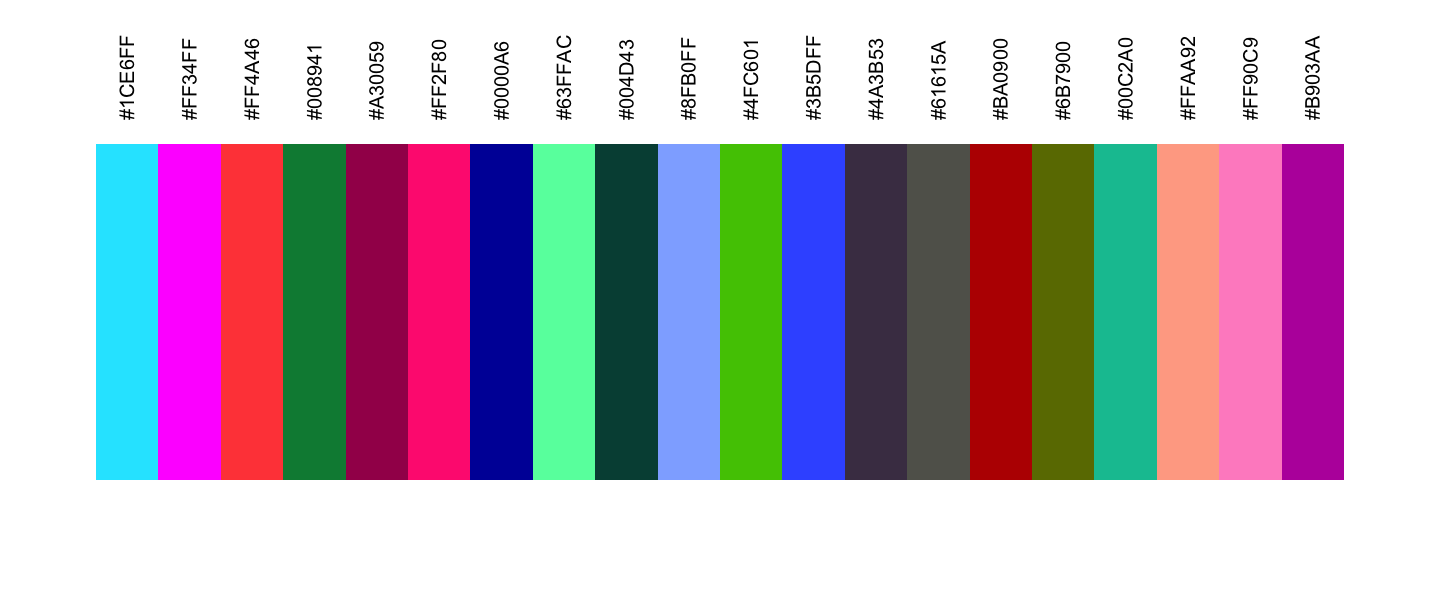

In [3]:
options(repr.plot.width=12,repr.plot.height=5)
gg_color_hue <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}
op=par(mar=c(5,4,6,4))
color_celltype=c('#1CE6FF','#FF34FF','#FF4A46','#008941','#A30059','#FF2F80','#0000A6','#63FFAC','#004D43','#8FB0FF','#4FC601','#3B5DFF','#4A3B53','#61615A','#BA0900','#6B7900','#00C2A0','#FFAA92','#FF90C9','#B903AA')
image(1:length(color_celltype),1, as.matrix(1:length(color_celltype)),col=color_celltype,ylab="",xlab="",axes=F)
axis(3,at=seq(1:length(color_celltype)),labels=color_celltype,las=2,lwd=0)


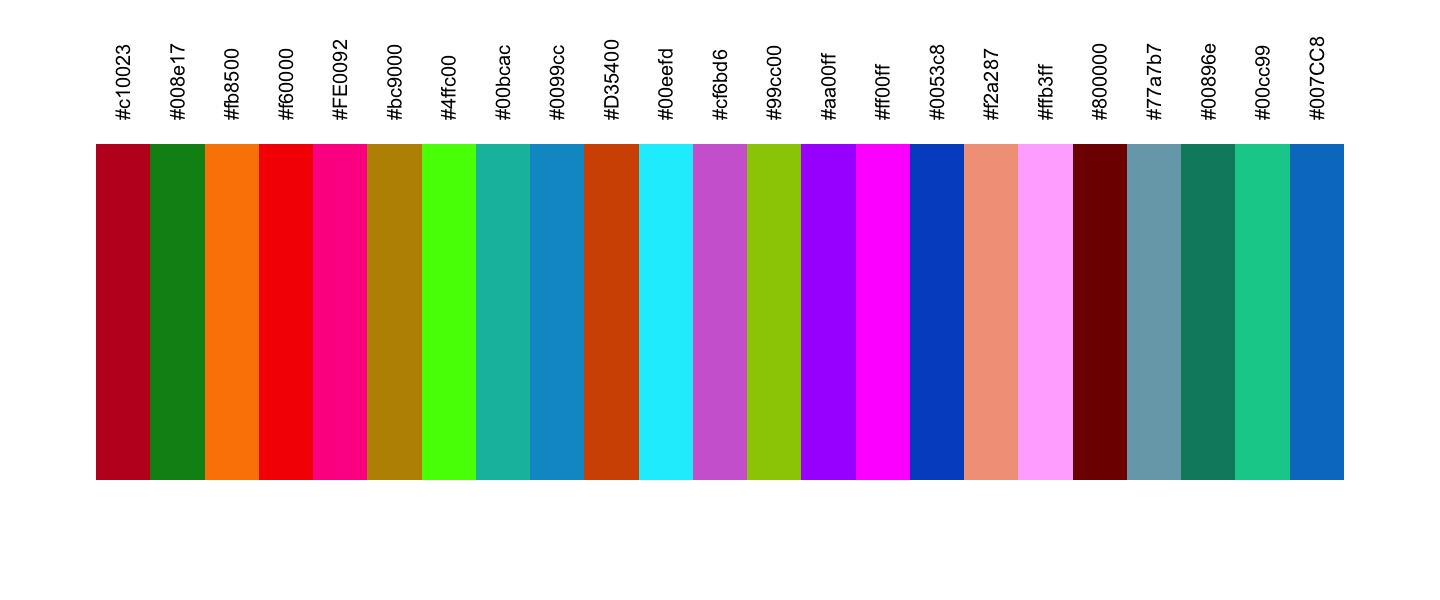

In [4]:
options(repr.plot.width=12,repr.plot.height=5)
op=par(mar=c(5,4,6,4))
col.set.update <- c("#c10023", "#008e17", "#fb8500", "#f60000", "#FE0092", "#bc9000","#4ffc00", "#00bcac", "#0099cc",
                    "#D35400", "#00eefd", "#cf6bd6", "#99cc00", "#aa00ff", "#ff00ff", "#0053c8",
                    "#f2a287","#ffb3ff", "#800000", "#77a7b7", "#00896e", "#00cc99", "#007CC8")
image(1:length(col.set.update),1, as.matrix(1:length(col.set.update)),col=col.set.update,ylab="",xlab="",axes=F)
axis(3,at=seq(1:length(col.set.update)),labels=col.set.update,las=2,lwd=0)

In [5]:
getplotdata=function(adata,reduction.use="tsne"){
    reduction_data=py_to_r(adata$obsm[[paste0("X_",reduction.use)]])
    embed_data=
    df=py_to_r(adata$obs)
    df$tSNE_1=reduction_data[,1]
    df$tSNE_2=reduction_data[,2]
    return(df)
}
    
getplot=function(df_desc,by.group = "res",ggtitle0 = "DESC",pt.size = 0.5){
   dim1="tSNE_1"
   dim2="tSNE_2"
   p= ggplot(df_desc,aes_string(x=dim1,y=dim2,color=by.group))+ geom_point(size=0.5)+ ggtitle(ggtitle0)+
    theme(plot.title = element_text(hjust = 0.5,face = "bold",size=20))+ 
    guides(color = guide_legend(override.aes = list(size=5)))+
    theme(legend.text = element_text(size=10))
   return(p)
}


In [6]:
datadirpath="."

########################################################

#dataset=paste0("ret","_result/")
filename=paste0(datadirpath,"/","/desc_corrected.h5ad")
#########################################################
ad=import("anndata",convert = FALSE)
adata=ad$read_h5ad(filename)

print(adata)


AnnData object with n_obs × n_vars = 23494 × 1000
    obs: 'cellname', 'celltype', 'celltype_com', 'celltypeID', 'BatchID', 'BATCH', 'batch', 'desc_0.8', 'max.prob'
    var: 'genename', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'mean-3', 'std-3', 'mean-4', 'std-4', 'mean-5', 'std-5'
    uns: 'BATCH_colors', 'celltype_colors', 'desc_0.8_colors', 'pca', 'prob_matrix0.8', 'umap'
    obsm: 'X_Embeded_z0.8', 'X_pca', 'X_tsne', 'X_tsne0.8', 'X_umap', 'X_umap0.8'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [7]:
df0=list()
df0$desc=list()

resolution_use="0.8"
desc_use=paste0("desc_",resolution_use)
tsne_use=paste0("tsne",resolution_use)
obsm_use=paste0("X_Embeded_z",resolution_use)

In [8]:
df_desc=getplotdata(adata,reduction.use = tsne_use)
#df_desc

df0$desc=list()
df0$desc$df_desc=df_desc
df0$desc$dr_desc=py_to_r(adata$obsm[[obsm_use]]) #just for KL

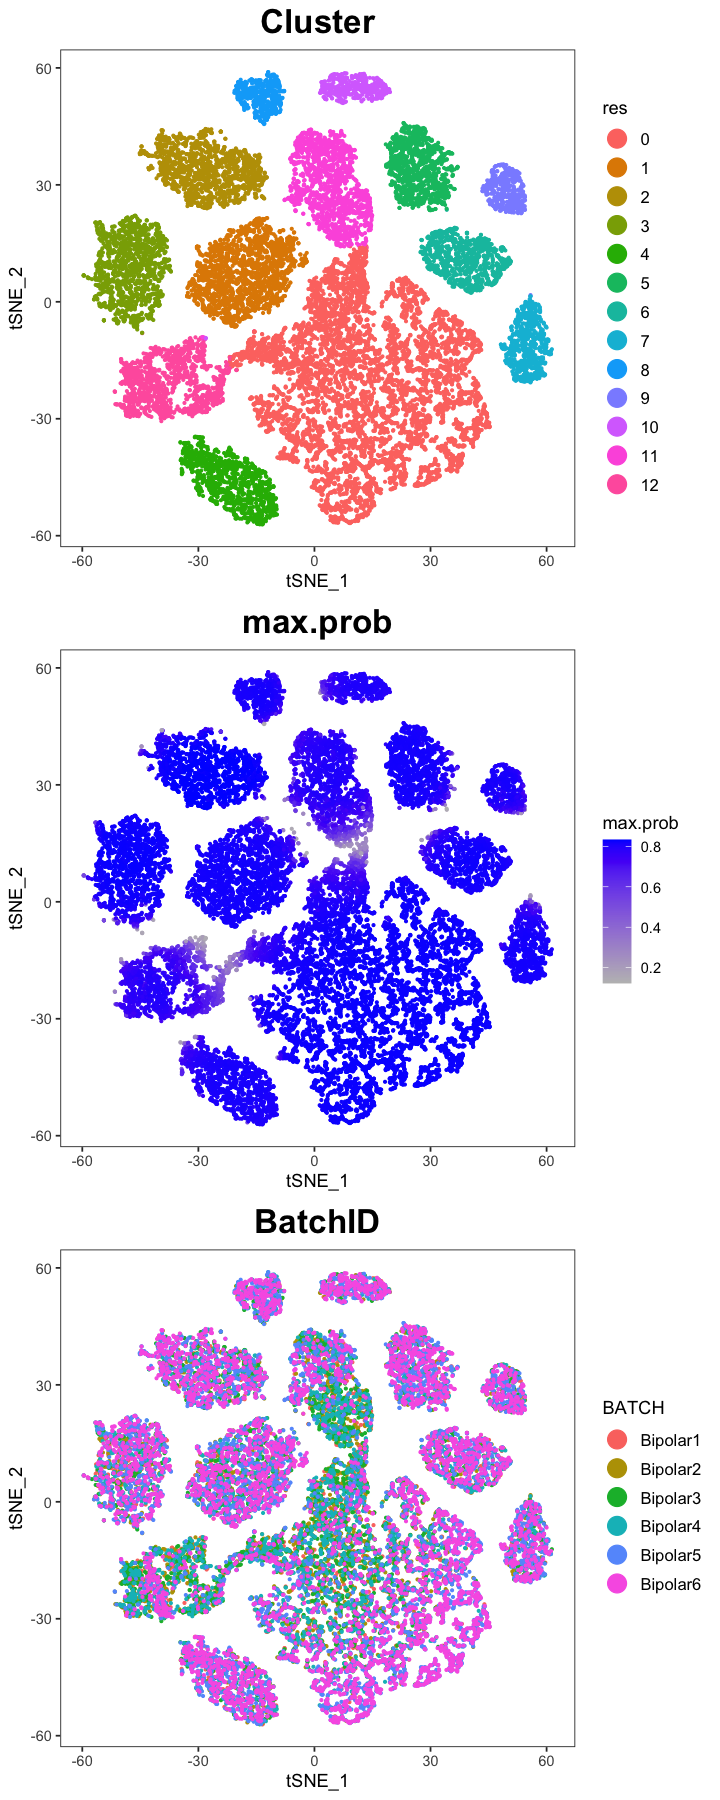

In [15]:
df_desc[,desc_use]=factor(as.numeric(as.character(df_desc[,desc_use])))
ari=mclust::adjustedRandIndex(df_desc[,'celltype'],df_desc[,desc_use])
#pdesc_1=getplot(df_desc,by.group = desc_use,ggtitle0 = paste0("Cluster","(ARI=",round(ari,3),")"),pt.size = 0.2)+theme(plot.title = element_text(color="red"))
df_desc$res=df_desc[,desc_use]

color_cluster =c('#FD7770','#E08900','#BD9E02',
'#8AAA02','#27B602','#02BF6F','#03C0AD',
'#01BCD9','#01ABF9','#8B91FF','#D875FE',
'#FD61DF','#FF63AD')
pdesc_1=getplot(df_desc,by.group = "res",ggtitle0 = "Cluster",pt.size = 0.5)+theme(plot.title = element_text(color="black"))+
  scale_color_manual(values=colorRampPalette(color_cluster)(13))+
  coord_cartesian()

color_BATCH = c('#FB766F','#B99F01','#0BB837','#02BCC3','#669BFB','#F866E5')
pdesc_3=getplot(df_desc,by.group = "BATCH",ggtitle0 = "BatchID",pt.size = 0.5)+
   scale_color_manual(values=colorRampPalette(color_BATCH)(6))+
  coord_cartesian()

x=cbind(df_desc[,c("tSNE_1","tSNE_2")],"max.prob"=apply(py_to_r(adata$uns[paste0("prob_matrix",resolution_use)]),1,max))

#pdesc_4=getfeature.plot(x,pt.size = 0.5,cols.use = c("red","grey"))[[1]]+coord_cartesian()
dim1="tSNE_1"
dim2="tSNE_2"
by.group="max.prob"
pdesc_4=ggplot(x,aes_string(x=dim1,y=dim2,color=by.group))+ geom_point(size=0.5)+scale_color_gradient(low="grey", high="blue")+
ggtitle("max.prob")+theme(plot.title = element_text(hjust = 0.5,face = "bold",size=20))



options(repr.plot.width = 6, repr.plot.height = 15)
p=ggarrange(pdesc_1,pdesc_4,pdesc_3,ncol = 1,nrow=3) # library(egg)
## 保存高分辨率图片
#ggsave(filename = "DESC_pancreas.pdf", p, width = 18, height = 10, dpi = 200)

# Figure 1

AnnData object with n_obs × n_vars = 23494 × 1000
    obs: 'cellname', 'celltype', 'celltype_com', 'celltypeID', 'BatchID', 'BATCH', 'batch', 'desc_0.8', 'max.prob'
    var: 'genename', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'mean-3', 'std-3', 'mean-4', 'std-4', 'mean-5', 'std-5'
    uns: 'BATCH_colors', 'celltype_colors', 'desc_0.8_colors', 'pca', 'prob_matrix0.8', 'umap'
    obsm: 'X_Embeded_z0.8', 'X_pca', 'X_tsne', 'X_tsne0.8', 'X_umap', 'X_umap0.8'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


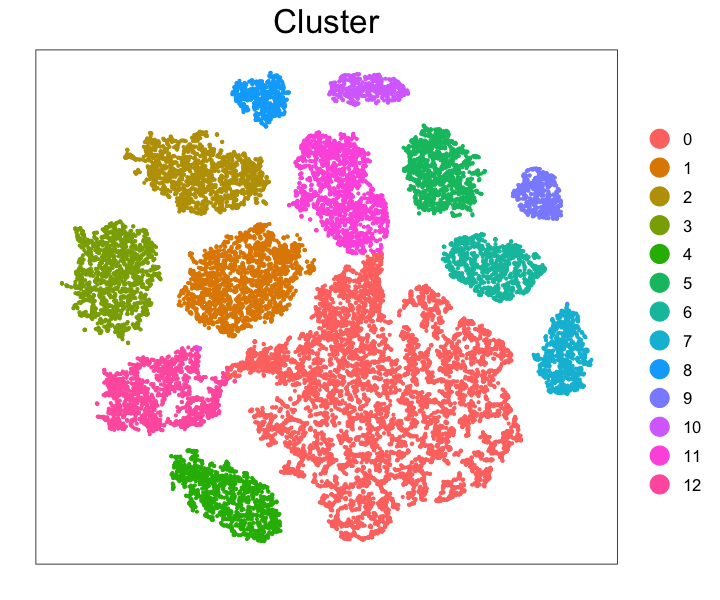

In [1]:
rm(list=ls())
options(warn = -1)
suppressPackageStartupMessages(library(knitr))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(png))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(kableExtra))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(vioplot))
suppressPackageStartupMessages(library(googleVis))
suppressPackageStartupMessages(library(reticulate))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(egg))
suppressPackageStartupMessages(library(ggvis))
old=theme_set(theme_bw()+theme(strip.background = element_rect(fill="white"),
                                         panel.background = element_blank(),
                                         panel.grid =element_blank()))
getplotdata=function(adata,reduction.use="tsne"){
    reduction_data=py_to_r(adata$obsm[[paste0("X_",reduction.use)]])
    embed_data=
    df=py_to_r(adata$obs)
    df$tSNE_1=reduction_data[,1]
    df$tSNE_2=reduction_data[,2]
    return(df)
}
    
getplot=function(df_desc,by.group = "res",ggtitle0 = "DESC",pt.size = 0.5){
   dim1="tSNE_1"
   dim2="tSNE_2"
   p= ggplot(df_desc,aes_string(x=dim1,y=dim2,color=by.group))+ geom_point(size=0.5)+ ggtitle(ggtitle0)+
    theme(plot.title = element_text(hjust = 0.5,size=20))+ 
    guides(color = guide_legend(override.aes = list(size=5)))+
    theme(legend.text = element_text(size=10))
   return(p)
}

datadirpath="."

########################################################

#dataset=paste0("ret","_result/")
filename=paste0(datadirpath,"/","/desc_corrected.h5ad")
#########################################################
ad=import("anndata",convert = FALSE)
adata=ad$read_h5ad(filename)

print(adata)

df0=list()
df0$desc=list()

resolution_use="0.8"
desc_use=paste0("desc_",resolution_use)
tsne_use=paste0("tsne",resolution_use)
obsm_use=paste0("X_Embeded_z",resolution_use)

df_desc=getplotdata(adata,reduction.use = tsne_use)
#df_desc

options(repr.plot.width = 6, repr.plot.height = 5)

df0$desc=list()
df0$desc$df_desc=df_desc
df0$desc$dr_desc=py_to_r(adata$obsm[[obsm_use]]) #just for KL

df_desc[,desc_use]=factor(as.numeric(as.character(df_desc[,desc_use])))
ari=mclust::adjustedRandIndex(df_desc[,'celltype'],df_desc[,desc_use])
#pdesc_1=getplot(df_desc,by.group = desc_use,ggtitle0 = paste0("Cluster","(ARI=",round(ari,3),")"),pt.size = 0.2)+theme(plot.title = element_text(color="red"))
df_desc$res=df_desc[,desc_use]

color_cluster =c('#FD7770','#E08900','#BD9E02',
'#8AAA02','#27B602','#02BF6F','#03C0AD',
'#01BCD9','#01ABF9','#8B91FF','#D875FE',
'#FD61DF','#FF63AD')
p1=getplot(df_desc,by.group = "res",ggtitle0 = "Cluster",pt.size = 0.5)+
theme(plot.title = element_text(color="black"),axis.text.x = element_blank(),axis.text.y = element_blank(),
     axis.ticks.x=element_blank(),axis.ticks.y=element_blank(),legend.title=element_blank())+labs(x = "",y="") +
  scale_color_manual(values=colorRampPalette(color_cluster)(13))+
  coord_cartesian()


p1
## 保存高分辨率图片
ggsave(filename = "fig1.svg", p1, width = 6, height = 5, dpi = 500)


# Figure2

AnnData object with n_obs × n_vars = 23494 × 1000
    obs: 'cellname', 'celltype', 'celltype_com', 'celltypeID', 'BatchID', 'BATCH', 'batch', 'desc_0.8', 'max.prob'
    var: 'genename', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'mean-3', 'std-3', 'mean-4', 'std-4', 'mean-5', 'std-5'
    uns: 'BATCH_colors', 'celltype_colors', 'desc_0.8_colors', 'pca', 'prob_matrix0.8', 'umap'
    obsm: 'X_Embeded_z0.8', 'X_pca', 'X_tsne', 'X_tsne0.8', 'X_umap', 'X_umap0.8'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


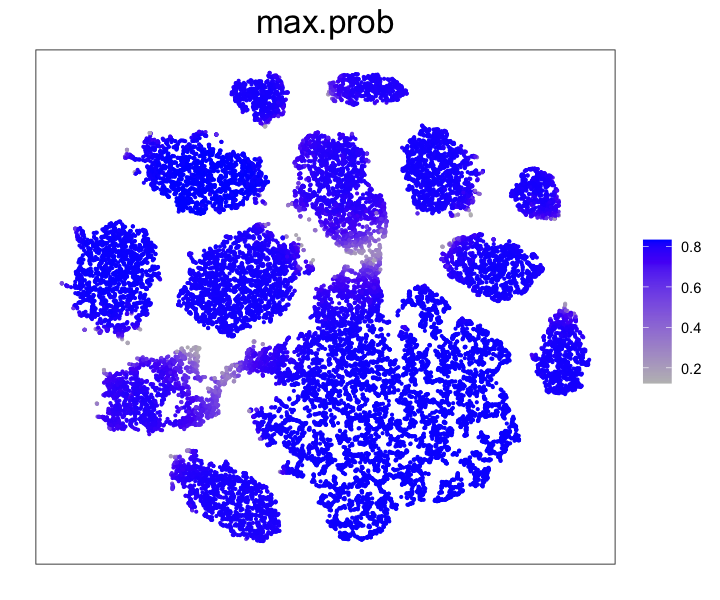

In [2]:
rm(list=ls())
options(warn = -1)
suppressPackageStartupMessages(library(knitr))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(png))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(kableExtra))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(vioplot))
suppressPackageStartupMessages(library(googleVis))
suppressPackageStartupMessages(library(reticulate))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(egg))
suppressPackageStartupMessages(library(ggvis))
old=theme_set(theme_bw()+theme(strip.background = element_rect(fill="white"),
                                         panel.background = element_blank(),
                                         panel.grid =element_blank()))
getplotdata=function(adata,reduction.use="tsne"){
    reduction_data=py_to_r(adata$obsm[[paste0("X_",reduction.use)]])
    embed_data=
    df=py_to_r(adata$obs)
    df$tSNE_1=reduction_data[,1]
    df$tSNE_2=reduction_data[,2]
    return(df)
}
    
getplot=function(df_desc,by.group = "res",ggtitle0 = "DESC",pt.size = 0.5){
   dim1="tSNE_1"
   dim2="tSNE_2"
   p= ggplot(df_desc,aes_string(x=dim1,y=dim2,color=by.group))+ geom_point(size=0.5)+ ggtitle(ggtitle0)+
    theme(plot.title = element_text(hjust = 0.5,size=20))+ 
    guides(color = guide_legend(override.aes = list(size=5)))+
    theme(legend.text = element_text(size=10))
   return(p)
}

datadirpath="."

########################################################

#dataset=paste0("ret","_result/")
filename=paste0(datadirpath,"/","/desc_corrected.h5ad")
#########################################################
ad=import("anndata",convert = FALSE)
adata=ad$read_h5ad(filename)

print(adata)

df0=list()
df0$desc=list()

resolution_use="0.8"
desc_use=paste0("desc_",resolution_use)
tsne_use=paste0("tsne",resolution_use)
obsm_use=paste0("X_Embeded_z",resolution_use)

df_desc=getplotdata(adata,reduction.use = tsne_use)
#df_desc

options(repr.plot.width = 6, repr.plot.height = 5)

df0$desc=list()
df0$desc$df_desc=df_desc
df0$desc$dr_desc=py_to_r(adata$obsm[[obsm_use]]) #just for KL

df_desc[,desc_use]=factor(as.numeric(as.character(df_desc[,desc_use])))
ari=mclust::adjustedRandIndex(df_desc[,'celltype'],df_desc[,desc_use])
#pdesc_1=getplot(df_desc,by.group = desc_use,ggtitle0 = paste0("Cluster","(ARI=",round(ari,3),")"),pt.size = 0.2)+theme(plot.title = element_text(color="red"))
df_desc$res=df_desc[,desc_use]

x=cbind(df_desc[,c("tSNE_1","tSNE_2")],"max.prob"=apply(py_to_r(adata$uns[paste0("prob_matrix",resolution_use)]),1,max))


#pdesc_4=getfeature.plot(x,pt.size = 0.5,cols.use = c("red","grey"))[[1]]+coord_cartesian()
dim1="tSNE_1"
dim2="tSNE_2"
by.group="max.prob"
p2=ggplot(x,aes_string(x=dim1,y=dim2,color=by.group))+ geom_point(size=0.5)+scale_color_gradient(low="grey", high="blue")+
ggtitle("max.prob")+
theme(plot.title = element_text(hjust = 0.5,size=20),axis.text.x = element_blank(),axis.text.y = element_blank(),
     axis.ticks.x=element_blank(),axis.ticks.y=element_blank(),legend.title=element_blank())+labs(x = "",y="")


p2
## 保存高分辨率图片
ggsave(filename = "fig2.svg", p2, width = 6, height = 5, dpi = 500)


# Fig3

AnnData object with n_obs × n_vars = 23494 × 1000
    obs: 'cellname', 'celltype', 'celltype_com', 'celltypeID', 'BatchID', 'BATCH', 'batch', 'desc_0.8', 'max.prob'
    var: 'genename', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'mean-3', 'std-3', 'mean-4', 'std-4', 'mean-5', 'std-5'
    uns: 'BATCH_colors', 'celltype_colors', 'desc_0.8_colors', 'pca', 'prob_matrix0.8', 'umap'
    obsm: 'X_Embeded_z0.8', 'X_pca', 'X_tsne', 'X_tsne0.8', 'X_umap', 'X_umap0.8'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


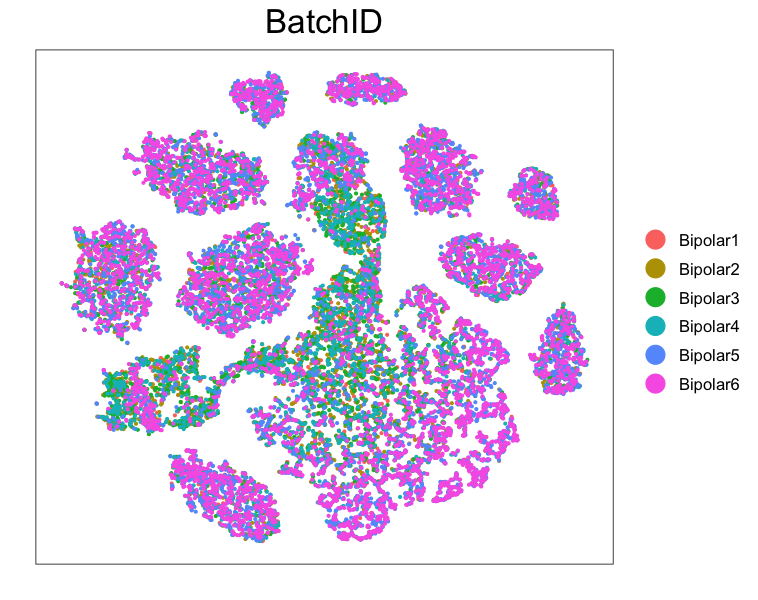

In [3]:
rm(list=ls())
options(warn = -1)
suppressPackageStartupMessages(library(knitr))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(png))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(kableExtra))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(vioplot))
suppressPackageStartupMessages(library(googleVis))
suppressPackageStartupMessages(library(reticulate))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(egg))
suppressPackageStartupMessages(library(ggvis))
old=theme_set(theme_bw()+theme(strip.background = element_rect(fill="white"),
                                         panel.background = element_blank(),
                                         panel.grid =element_blank()))
getplotdata=function(adata,reduction.use="tsne"){
    reduction_data=py_to_r(adata$obsm[[paste0("X_",reduction.use)]])
    embed_data=
    df=py_to_r(adata$obs)
    df$tSNE_1=reduction_data[,1]
    df$tSNE_2=reduction_data[,2]
    return(df)
}
    
getplot=function(df_desc,by.group = "res",ggtitle0 = "DESC",pt.size = 0.5){
   dim1="tSNE_1"
   dim2="tSNE_2"
   p= ggplot(df_desc,aes_string(x=dim1,y=dim2,color=by.group))+ geom_point(size=0.5)+ ggtitle(ggtitle0)+
    theme(plot.title = element_text(hjust = 0.5,size=20))+ 
    guides(color = guide_legend(override.aes = list(size=5)))+
    theme(legend.text = element_text(size=10))
   return(p)
}

datadirpath="."

########################################################

#dataset=paste0("ret","_result/")
filename=paste0(datadirpath,"/","/desc_corrected.h5ad")
#########################################################
ad=import("anndata",convert = FALSE)
adata=ad$read_h5ad(filename)

print(adata)

df0=list()
df0$desc=list()

resolution_use="0.8"
desc_use=paste0("desc_",resolution_use)
tsne_use=paste0("tsne",resolution_use)
obsm_use=paste0("X_Embeded_z",resolution_use)

df_desc=getplotdata(adata,reduction.use = tsne_use)
#df_desc

options(repr.plot.width = 6.32, repr.plot.height = 5)

df0$desc=list()
df0$desc$df_desc=df_desc
df0$desc$dr_desc=py_to_r(adata$obsm[[obsm_use]]) #just for KL

df_desc[,desc_use]=factor(as.numeric(as.character(df_desc[,desc_use])))
ari=mclust::adjustedRandIndex(df_desc[,'celltype'],df_desc[,desc_use])
#pdesc_1=getplot(df_desc,by.group = desc_use,ggtitle0 = paste0("Cluster","(ARI=",round(ari,3),")"),pt.size = 0.2)+theme(plot.title = element_text(color="red"))
df_desc$res=df_desc[,desc_use]

color_BATCH = c('#FB766F','#B99F01','#0BB837','#02BCC3','#669BFB','#F866E5')
p3=getplot(df_desc,by.group = "BATCH",ggtitle0 = "BatchID",pt.size = 0.5)+
theme(axis.text.x = element_blank(),axis.text.y = element_blank(),
     axis.ticks.x=element_blank(),axis.ticks.y=element_blank(),legend.title=element_blank())+labs(x = "",y="")+
   scale_color_manual(values=colorRampPalette(color_BATCH)(6))+
  coord_cartesian()


p3
## 保存高分辨率图片
ggsave(filename = "fig3.svg", p3, width = 6.32, height = 5, dpi = 500)
